<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_CursoPython/blob/main/Modulo3_RedesNeuronales/redes_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autores:** Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

**Institución:** Universidad de la Rioja

**Fecha:** Junio/2025

**Clasificación de Imágenes con Redes Neuronales Convolucionales**

Las redes neuronales convolucionales son conocidas habitualmente por sus siglas en inglés, CNNs (Convolutional Neural Networks).


### Librerías

Verificación versión de TensorFlow

In [ ]:
import matplotlib.pyplot as plt
import random
import seaborn as sns
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import kagglehub
from sklearn.metrics import classification_report  #Cálculo de las métricas
print(tf.__version__)

2.18.0


Los imágenes a clasificar son tomadas de:

Julien de la Bruère-Terreault, conjunto de datos "Rock-Paper-Scissors Images", disponible bajo la licencia CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0/) en https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

In [ ]:
# Clonar repositorio
!git clone https://github.com/ednavivianasegura/ERAP_CursoPython/
os.chdir("/content/ERAP_CursoPython/Modulo2_Fundamentos_AI")



Cloning into 'ERAP_CursoPython'...
remote: Enumerating objects: 942, done.
remote: Counting objects: 100% (238/238), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 942 (delta 200), reused 110 (delta 101), pack-reused 704 (from 2)
Receiving objects: 100% (942/942), 55.01 MiB | 22.51 MiB/s, done.
Resolving deltas: 100% (469/469), done.


In [ ]:
# Descarga el dataset "rockpaperscissors" del usuario "drgfreeman" usando Kaggle Hub
# Retorna la ruta donde se guardó el dataset descargado
path = kagglehub.dataset_download("drgfreeman/rockpaperscissors")

# Lista todos los archivos y directorios contenidos en la ruta de descarga
# os.listdir() devuelve una lista con los nombres de las entradas en el directorio
contenido = os.listdir(path)

# Notas importantes:
# 1. kagglehub.dataset_download() descarga el dataset en un formato específico de Kaggle
# 2. El dataset puede venir en diferentes estructuras:
#    - Como directorio con subdirectorios (rock/, paper/, scissors/)
#    - Como archivo comprimido (dataset.zip)
# 3. Si os.listdir() falla, puede ser porque:
#    - La descarga no se completó correctamente
#    - El path retornado no es un directorio directamente accesible
#    - Se necesitan permisos adicionales



In [ ]:
# Imprime el número de archivos en el directorio 'rock'
print(len(os.listdir(path + "/" + "rock")))  # Muestra cuántas imágenes de 'rock' hay disponibles

# Imprime el número de archivos en el directorio 'paper'
print(len(os.listdir(path + "/" + "paper")))  # Muestra cuántas imágenes de 'paper' hay disponibles

# Lista TODOS los archivos en el directorio 'scissors' (puede ser mucha salida)
print(os.listdir(path + "/" + "scissors"))  # Muestra los nombres de todos los archivos de 'scissors'

### Cargar Imágenes del repositorio:

Se considera que las imágenes están organizadas por categoría, almacenadas en directorios separados llamados *rock*, *paper* y *scissors*. Dentro de cada uno, los archivos de imagen están nombrados secuencialmente desde 0.png hasta 699.png, representando su número correspondiente.


In [ ]:
# Descripción de clases y su identificador
descripcion = ("paper", "rock", "scissors")
clases = {"paper": 0, "rock": 1, "scissors": 2}

# Número de imágenes de cada clase a considerar (máximo 700)
num_img_clase = 700

# Porcentajes de división
train_ratio = 0.7
test_ratio = 0.3

# Calcular número de imágenes para entrenamiento y prueba



# Inicializar arrays para almacenar los datos




# Para cada clase, seleccionar 700 imágenes aleatorias y dividirlas en train/test






# Visualización de imágenes aleatorias

In [ ]:
# Crear una figura de matplotlib con tamaño 10x10 pulgadas


# Mostrar 100 imágenes en una cuadrícula de 10x10



## Visualización de una sola imagen en tamaño grande

In [ ]:
num_aleatorio = random.randint(0, 700)
# Crear una nueva figura de matplotlib (tamaño por defecto)


# Mostrar la imagen de prueba número aleatorio del conjunto de datos


# Añadir una barra de color (colorbar) que indica la escala de valores de píxeles


In [ ]:
### Escalar los píxeles de las imágenes del rango [0, 255] al rango [0, 1]


# Modelo CNN para Clasificación de Imágenes

In [ ]:
# Definición del modelo secuencial (capas apiladas linealmente)


# Cofigurarción del Modelo para Entrenamiento

In [ ]:
#Compilar

# Entrenamiento de la CNN

In [ ]:
# Entrena la red neuronal con las imágenes y clases del conjunto de entrenamiento.
# El proceso se repite durante 10 épocas, es decir, el modelo verá todo el conjunto de datos 10 veces.



# Evaluación del modelo

In [ ]:
# Evalúa el rendimiento del modelo sobre el conjunto de prueba (imágenes y etiquetas reales)
# Retorna la pérdida (loss) y la exactitud (accuracy)




# Clasificación de las imágenes del conjunto de entrenamiento con la CNN entrenada

In [ ]:
# Genera predicciones del modelo para las imágenes del conjunto de pruentrenamiento
# El resultado será un array con las probabilidades asignadas a cada clase para cada imagen


# Clasificación de las Imágenes del conjunto de prueba con la CNN entrenada

# Salida de la CNN para cada imagen del conjunto de prueba

# Resultado de la evaluación: matriz de confusión:

# Actividad

Dataset: CIFAR-10
CIFAR-10 es un conjunto de datos clásico que contiene 60,000 imágenes a color de 32x32 píxeles, divididas en 10 clases (aviones, automóviles, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones). Cada clase tiene 6,000 imágenes.


Realizar la calsificación de las 10 clases utilizando CNN

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


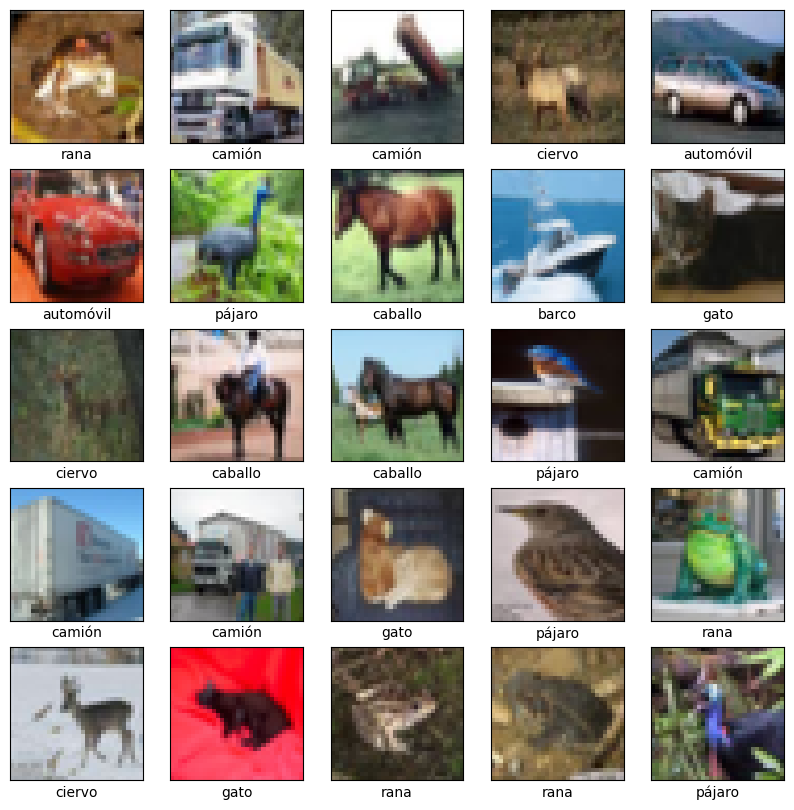

In [ ]:
# Cargar el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalizar los valores de píxeles al rango [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Nombres de las clases
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
               'perro', 'rana', 'caballo', 'barco', 'camión']

# Visualizar algunas imágenes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()